In [78]:
pip install numpy scipy scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 1. Analyze the Digits Data Set

In [79]:
import numpy
import sklearn
import sklearn.datasets
import sklearn.model_selection
import sklearn.decomposition
import sklearn.neighbors
import sklearn.metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from collections import Counter

In [ ]:
digits = sklearn.datasets.load_digits()
X = digits.data
y = digits.target

print(f"\nShape of X: {X.shape}, Shape of y: {y.shape}")

# Averages and standard deviations for features
feature_means = numpy.mean(X, axis=0)
feature_stds = numpy.std(X, axis=0)
print(f"\nFeature Means (first 10): {feature_means[:10]}")
print(f"\nFeature Standard Deviations (first 10): {feature_stds[:10]}")

# Number of training elements per class
class_counts = Counter(y)
print(f"\nNumber of samples per class: {class_counts}")

# Overall dataset mean and standard deviation
overall_mean = numpy.mean(X)
overall_std = numpy.std(X)
print(f"\nOverall Mean of X: {overall_mean}")
print(f"Overall Standard Deviation of X: {overall_std}")


Shape of X: (1797, 64), Shape of y: (1797,)

Feature Means (first 10): [0.00000000e+00 3.03839733e-01 5.20478575e+00 1.18358375e+01
 1.18480801e+01 5.78185865e+00 1.36227045e+00 1.29660545e-01
 5.56483027e-03 1.99387869e+00]

Feature Standard Deviations (first 10): [0.         0.90693964 4.75350317 4.24765948 4.28619491 5.66484088
 3.32484969 1.03709417 0.09419533 3.19527098]

Number of samples per class: Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})

Overall Mean of X: 4.884164579855314
Overall Standard Deviation of X: 6.016787548672236


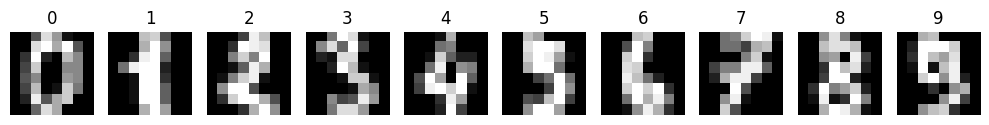

In [81]:
# Plot some digits
fig, axes = plt.subplots(1, 10, figsize=(10, 5))
for ax, img, label in zip(axes, digits.images[:10], y[:10]):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f"{label}")
plt.tight_layout()
plt.show()

# 2. Splits: train, test and normalization of data

In [ ]:
# 1. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Normalize the data using z-score normalization
scaler = StandardScaler()

X_train_normalized = scaler.fit_transform(X_train) 
X_test_normalized = scaler.transform(X_test)

# Print the shapes of the datasets
print(f"Training data shape: {X_train_normalized.shape}, Test data shape: {X_test_normalized.shape}")

# Verify that the data is centered and has a standard deviation of 1
print(f"Mean of X_train: {numpy.mean(X_train_normalized, axis=0)}")
print(f"Std of X_train: {numpy.std(X_train_normalized, axis=0)}")

Training data shape: (1257, 64), Test data shape: (540, 64)
Mean of X_train: [ 0.00000000e+00  4.90370583e-16 -2.52604443e-17 -1.04249015e-16
 -1.07401050e-16  1.99610504e-17  3.16462140e-16 -2.06676363e-17
 -7.45227269e-18 -1.92544645e-17 -7.87843228e-17 -2.03143433e-18
  6.85388279e-17  9.07079591e-17 -1.51562666e-16 -2.09811837e-16
 -6.22568381e-17  3.02418746e-16  4.71646058e-17  5.29939391e-19
 -2.72035554e-17 -2.66736160e-17  1.41847110e-16 -7.28666663e-17
 -4.11928513e-16 -8.67334137e-17 -6.29068419e-17 -5.98831512e-17
  8.63801208e-17 -1.54212363e-16  2.38296080e-16 -5.05683624e-16
  0.00000000e+00 -6.27094946e-18  5.76750704e-17 -5.72334543e-17
  1.66930908e-17 -8.12573733e-17  6.25328482e-17  0.00000000e+00
 -2.88375352e-16  3.10721130e-16  1.02454949e-17 -2.40239191e-17
  1.30674222e-16  6.83621815e-17 -9.17678379e-17  4.91585028e-16
  1.29625383e-16  7.10118784e-17  8.08599188e-17  9.90986662e-17
 -3.64333331e-17 -1.44850100e-17  7.15418178e-17  1.45954141e-16
  2.90787680e

# 3. Projection in different main components

In [92]:
# 1. Apply Principal Component Analysis (PCA)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

# 2. Apply Truncated Singular Value Decomposition (SVD)
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(X_train_normalized)
X_test_svd = svd.transform(X_test_normalized)

# 3. Apply Linear Discriminant Analysis (LDA)
lda = LDA(n_components=2) 
X_train_lda = lda.fit_transform(X_train_normalized, y_train)
X_test_lda = lda.transform(X_test_normalized)

# Print the shape of results to ensure reduction in dimensions
print(f"PCA Result Shape: {X_train_pca.shape}")
print(f"Truncated SVD Result Shape: {X_train_svd.shape}")
print(f"LDA Result Shape (Training Data): {X_train_lda.shape}")
print(f"LDA Result Shape (Test Data): {X_test_lda.shape}")


PCA Result Shape: (1257, 2)
Truncated SVD Result Shape: (1257, 2)
LDA Result Shape (Training Data): (1257, 2)
LDA Result Shape (Test Data): (540, 2)


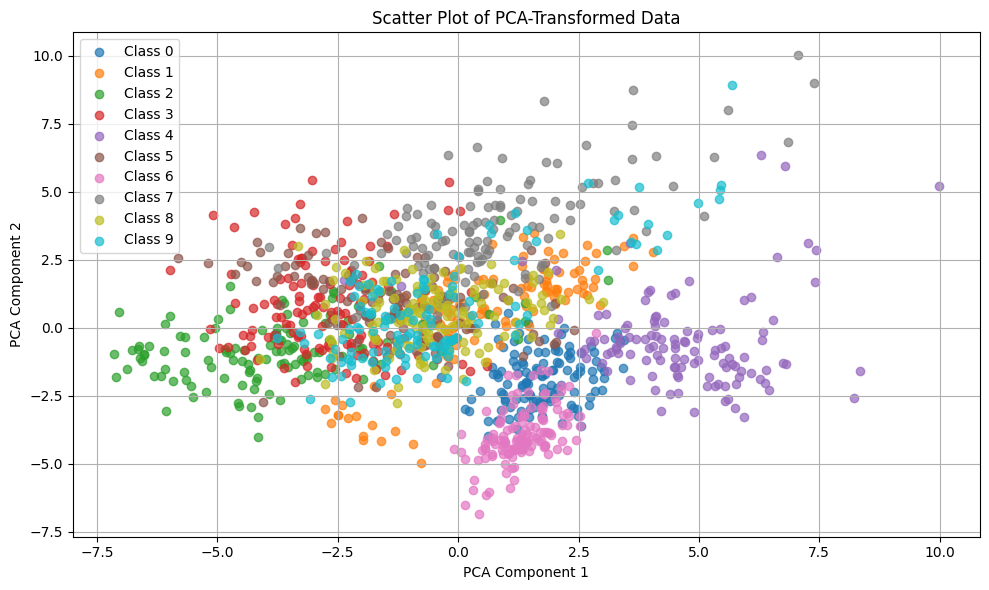

In [84]:
# Scatter plot for PCA-transformed training data
plt.figure(figsize=(10, 6))
for class_label in range(len(digits.target_names)):
    plt.scatter(
        X_train_pca[y_train == class_label, 0],
        X_train_pca[y_train == class_label, 1],
        label=f"Class {class_label}",
        alpha=0.7
    )

plt.title("Scatter Plot of PCA-Transformed Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

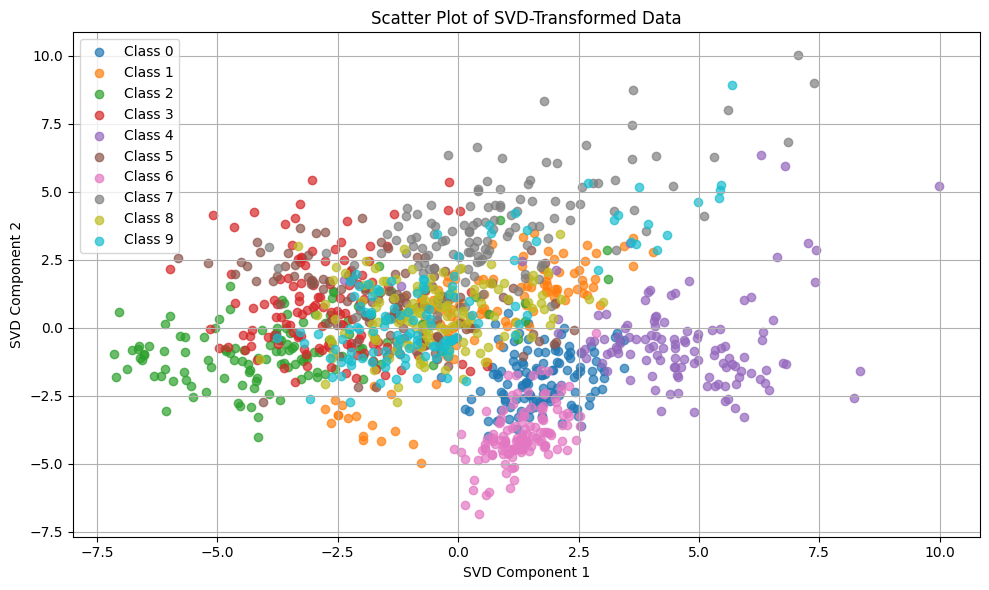

In [85]:
# Scatter plot for SVD-transformed training data
plt.figure(figsize=(10, 6))
for class_label in range(len(digits.target_names)):
    plt.scatter(
        X_train_svd[y_train == class_label, 0],
        X_train_svd[y_train == class_label, 1],
        label=f"Class {class_label}",
        alpha=0.7
    )

plt.title("Scatter Plot of SVD-Transformed Data")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

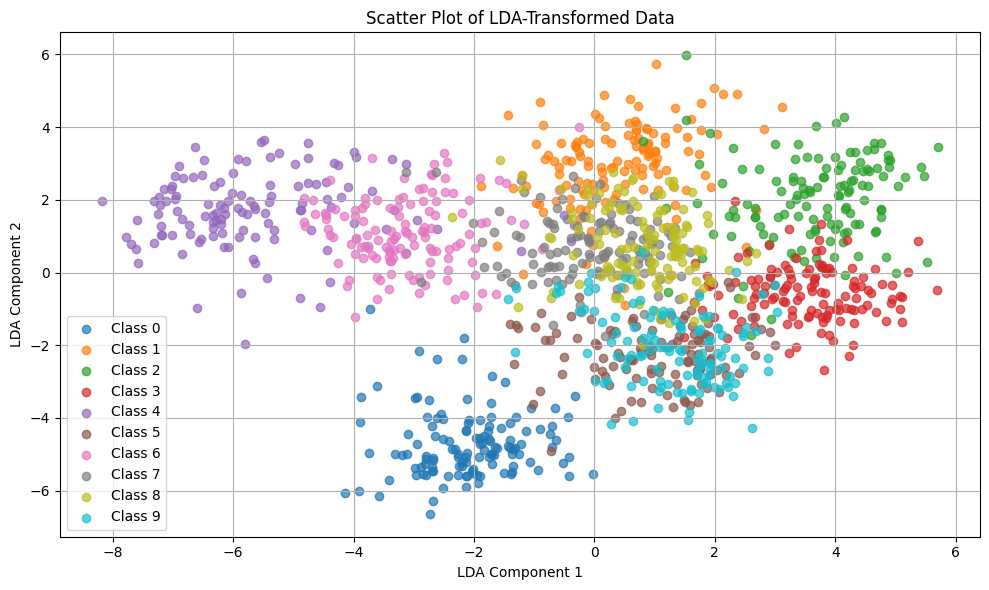

In [86]:
# Scatter plot for LDA-transformed training data
plt.figure(figsize=(10, 6))
for class_label in range(len(digits.target_names)):
    plt.scatter(
        X_train_lda[y_train == class_label, 0],
        X_train_lda[y_train == class_label, 1],
        label=f"Class {class_label}",
        alpha=0.7
    )

plt.title("Scatter Plot of LDA-Transformed Data")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Use cross-validation to estimate the optimal number of K neighbors

In [87]:
def compute_test(X, y, clf, n_dimensions_range, n_neighbors_range, cv=10):
    results = {}
    
    for n_dims in n_dimensions_range:
        # Perform PCA with n_dims components
        pca = PCA(n_components=n_dims)
        X_pca = pca.fit_transform(X)
        
        for n_neighbors in n_neighbors_range:
            # Initialize k-NN with current number of neighbors n_neighbors
            clf.set_params(n_neighbors=n_neighbors)
            
            # Perform cross-validation
            kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
            scores = []
            
            for train_index, test_index in kfold.split(X_pca):
                X_train_fold, X_test_fold = X_pca[train_index], X_pca[test_index]
                y_train_fold, y_test_fold = y[train_index], y[test_index]
                
                clf.fit(X_train_fold, y_train_fold)
                y_pred = clf.predict(X_test_fold)
                scores.append(accuracy_score(y_test_fold, y_pred))
            
            # Store the mean accuracy score for this combination
            mean_score = numpy.mean(scores)
            results[(n_dims, n_neighbors)] = mean_score
    
    return results

### Non-Normalized

In [ ]:
clf = KNeighborsClassifier()

n_dimensions_range = [2, 5, 10, 20, 30, 40, 50, 60]
n_neighbors_range = [1, 3, 5, 7, 10]

# Execute the test results
results = compute_test(X_train, y_train, clf, n_dimensions_range, n_neighbors_range, cv=10)

# Find the best combination of dimensions and neighbors
best_combination = max(results, key=results.get)
best_score = results[best_combination]

print(f"Best combination (dimensions, neighbors): {best_combination}")
print(f"Best cross-validation accuracy: {best_score}")

Best combination (dimensions, neighbors): (20, 1)
Best cross-validation accuracy: 0.9840825396825398


In [89]:
best_dimensions, best_neighbors = best_combination 

pca = PCA(n_components=best_dimensions)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

param_grid = {
    'n_neighbors': [best_neighbors],
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan']
}

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Initialize GridSearch
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Perform the grid search on the reduced training data
grid_search.fit(X_train_pca, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_pca, y_test)

print(f"Test Accuracy with Best Model: {test_accuracy}")

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.9840761904761905
Test Accuracy with Best Model: 0.9814814814814815


## Normalized

In [90]:
clf = KNeighborsClassifier()

n_dimensions_range = [2, 5, 10, 20, 30, 40, 50, 60]
n_neighbors_range = [1, 3, 5, 7, 10]

# Execute the test results
results = compute_test(X_train_normalized, y_train, clf, n_dimensions_range, n_neighbors_range, cv=10)

# Find the best combination of dimensions and neighbors
best_combination = max(results, key=results.get)
best_score = results[best_combination]

print(f"Best combination (dimensions, neighbors): {best_combination}")
print(f"Best cross-validation accuracy: {best_score}")

Best combination (dimensions, neighbors): (20, 5)
Best cross-validation accuracy: 0.976126984126984


In [ ]:
best_dimensions, best_neighbors = best_combination 

pca = PCA(n_components=best_dimensions)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

param_grid = {
    'n_neighbors': [best_neighbors],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the k-NN classifier
knn = KNeighborsClassifier()

# Initialize GridSearch
grid_search = GridSearchCV(
    knn,
    param_grid,
    cv=10,
    scoring='accuracy',
    n_jobs=-1
)

# Perform the grid search on the reduced training data
grid_search.fit(X_train_pca, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_accuracy}")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_pca, y_test)

print(f"Test Accuracy with Best Model: {test_accuracy}")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9713777777777779
Test Accuracy with Best Model: 0.9685185185185186
